In [2]:
#Welcome to AlphaGenome Playground!This file is a simple illustration of what AlphaGenome could achieve
#Github @Imperator-Summus @vanted7580
!pip install alphagenome
#imports
from alphagenome import colab_utils
from alphagenome.data import gene_annotation
from alphagenome.data import genome
from alphagenome.data import transcript as transcript_utils
from alphagenome.interpretation import ism
from alphagenome.models import dna_client
from alphagenome.models import variant_scorers
from alphagenome.visualization import plot_components
import matplotlib.pyplot as plt
import pandas as pd

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.6/168.6 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.3 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26098 sha256=396e3b05528ca86cb9e3cdc5d3e38eda48b57ce12b4e5ae8fb65c7bff2812f3b
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built intervaltree


In [7]:
#This function uses inputs to predict changes in gene expression caused by a genetic variant
def AlphaGenomePredictVariant (api_key, chromosome, position, interval_size, ref, alt, ontology_terms):

  dna_model = dna_client.create(api_key)#an API key is requried, it can be found on AlphaGenome's github page
  interval = genome.Interval(chromosome=chromosome,
                             start=max(position - interval_size // 2,1),
                             end=(position + interval_size // 2)
                             ) #using information above, find the interval of interest
  variant = genome.Variant(chromosome, position, ref, alt) # variant (mutation) information

  RNAseq_predicted_output = dna_model.predict_variant(
      interval=interval,variant=variant,
      ontology_terms=ontology_terms,requested_outputs=[dna_client.OutputType.RNA_SEQ,])

  return  RNAseq_predicted_output #return the output


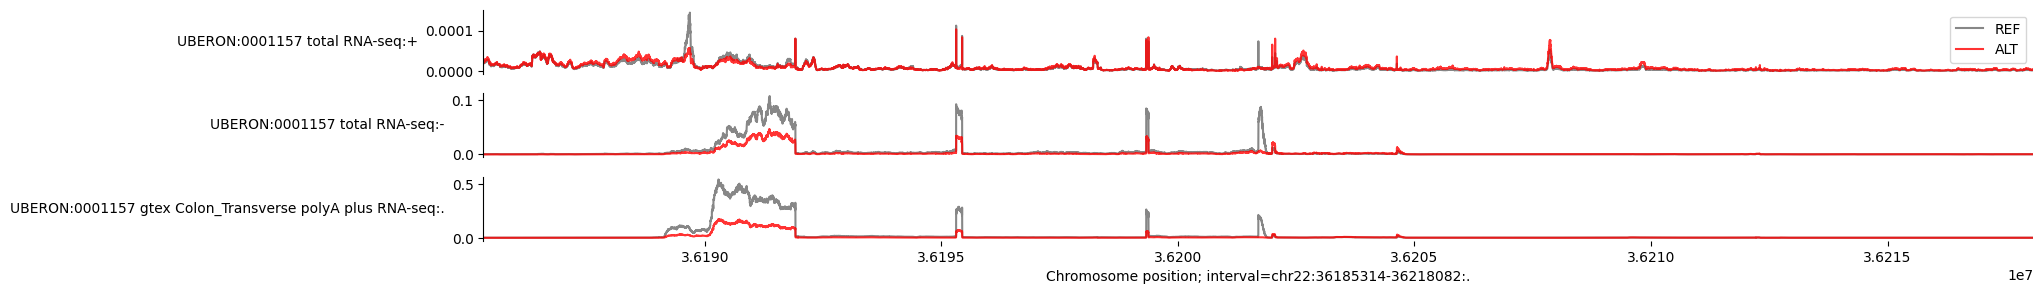

In [15]:
# Test Run
demo_output = AlphaGenomePredictVariant(

    api_key="Your_API_Key", #API key, you can request this from AlphaGenome's GitHub page
    chromosome = "chr22", #chromosome number
    position=36201698, #the exact location of the variant
    interval_size=1048576, #set the size of your sequence of interest
    ref="A", #original basepairs
    alt="C", #variant basepair
    ontology_terms=["UBERON:0001157"] #you can find this information from ontology_term.csv
    )



# Plot the data and get the figure object
plot_components.plot(
    [
        plot_components.OverlaidTracks(
            tdata={
                'REF': demo_output.reference.rna_seq,
                'ALT': demo_output.alternate.rna_seq,
            },
            colors={'REF': 'dimgrey', 'ALT': 'red'},
        ),
    ],
    interval=demo_output.reference.rna_seq.interval.resize(2**15),
    # Annotate the location of the variant as a vertical line.
)
plt.show()